# La surcharge des opérateurs

https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/operators/operator-overloading

Le langage C# dispose de plusieurs opérateurs tels que le +, -, /, *, ++, --, etc.

Ces opérateurs permettent d’exécuter des opérations de bases entre objets ou sur soi-même.

Il existe plusieurs types d’opérateurs:

- Unaire (sur soi-même)
- Binaire et abrégé (entre deux objets)
- Comparaison (entre deux objets)
- Indexe (sur soi-même)
- Conversion (sur soi-même)

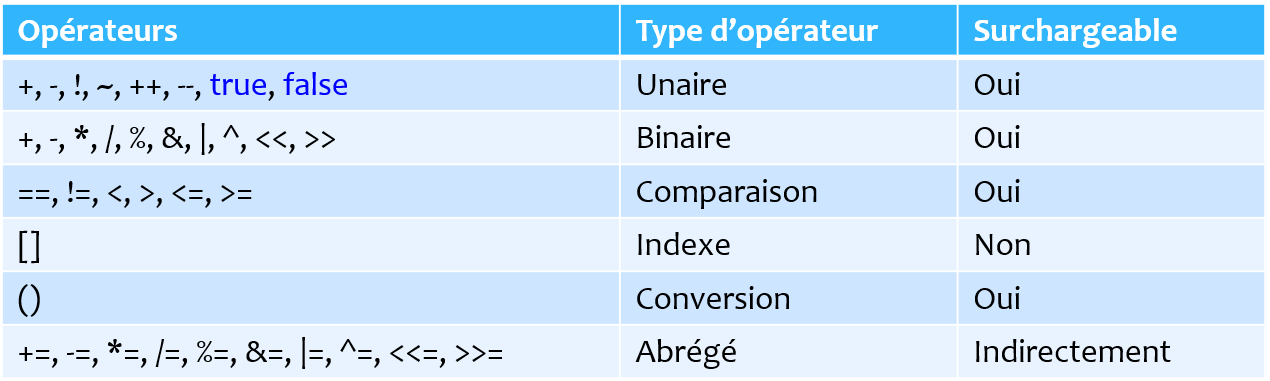

[Voir la liste complète des opérateurs](https://docs.microsoft.com/fr-ca/dotnet/csharp/language-reference/operators/operator-overloading)

## Surcharge d’opérateurs unaires

Les opérateurs unaires retournent une valeur modifiée de l’objet courant.

La surcharge de ces opérateurs requiert la définition d’une méthode statique qui retourne et accepte une valeur du même type que la classe courante.

Une surcharge d’opérateur unaire est constituée de:
- Modificateur public (`public`)
- Modificateur statique (`static`)
- Type de retour identique à la classe courante (Voiture, Chien, etc.)
- Mot clé « `operator` »
- Un opérateur unaire (`++`, `--`, `!`, etc.)
- Un paramètre de type identique à la classe courante (Voiture, Chien, etc.)

---
```cs
public static Coordonee operator ++(Coordonee coordonee)
{
    return new Coordonee(coordonee.X + 1, coordonee.Y + 1, coordonee.Z + 1);
}

public static Coordonee operator --(Coordonee coordonee)
{
    return new Coordonee(coordonee.X - 1, coordonee.Y - 1, coordonee.Z - 1);
}

public static Coordonee operator !(Coordonee coordonee)
{
    return new Coordonee(-coordonee.X, -coordonee.Y, -coordonee.Z);
}
```
---

## Surcharge d’opérateurs binaires

Les opérateurs binaires retournent une nouvelle valeur suivant une opération binaire entre deux objets.

La surcharge de ces opérateurs requiert la définition d’une méthode statique qui retourne une valeur et accepte deux valeurs du même type que la classe courante.

Lorsqu’un opérateur binaire est surchargé, son opérateur d’affectation abrégée est également surchargé par défaut.

Une surcharge d’opérateur binaire est constituée de:
- Modificateur public (`public`)
- Modificateur statique (`static`)
- Type de retour identique à la classe courante (Voiture, Chien, etc.)
- Mot clé « `operator` »
- Un opérateur binaire (`+`, `-`, `/`, `*`, etc.)
- Deux paramètres de type identique à la classe courante (Voiture, Chien, etc.)

---
```cs
public static Coordonee operator +(Coordonee a, Coordonee b)
{
    return new Coordonee(a.X + b.X, a.Y + b.Y, a.Z + b.Z);
}

public static Coordonee operator -(Coordonee a, Coordonee b)
{
    return new Coordonee(a.X - b.X, a.Y - b.Y, a.Z - b.Z);
}
```
---

## Surcharge d’opérateurs de comparaison

Les opérateurs de comparaison retournent une valeur booléenne représentant le résultat d’une comparaison quelconque entre deux objets.

La surcharge de ces opérateurs requiert la définition d’une méthode statique qui retourne une valeur booléenne et accepte deux valeurs du même type que la classe courante.

La surcharge des deux opérateurs d’égalité (`==` et `!=`) est plus complexe.

- La surcharge de la méthode « `Equals` » est requise
- La surcharge de la méthode « `GetHashCode` » est recommandée

Une surcharge d’opérateur de comparaison est constituée de:

- Modificateur public (`public`)
- Modificateur statique (`static`)
- Type de retour booléen (`bool`)
- Mot clé « `operator` »
- Un opérateur de comparaison (`==`, `!=`, `>`, `<`, etc.)
- Deux paramètres de type identique à la classe courante (Voiture, Chien, etc.)

---
```cs
public static bool operator >(Coordonee a, Coordonee b)
{
    return a.X > b.X || a.Y > b.Y || a.Z > b.Z;
}

public static bool operator <(Coordonee a, Coordonee b)
{
    return a.X < b.X || a.Y < b.Y || a.Z < b.Z;
}
```
---

### Surcharge d’opérateurs d’égalité

Les opérateurs `==` et `!=` utilisent habituellement la méthode surchargée« `Equals` ».

La méthode « `Equals` » doit donc être surchargée correctement.

La méthode « `GetHashCode` » est utilisée par plusieurs collections .NET donc il est fortement suggéré de surcharger cette méthode également.

- La valeur retournée par la méthode devrait représenter un nombre (hash) unique pour l’état courant de la classe.

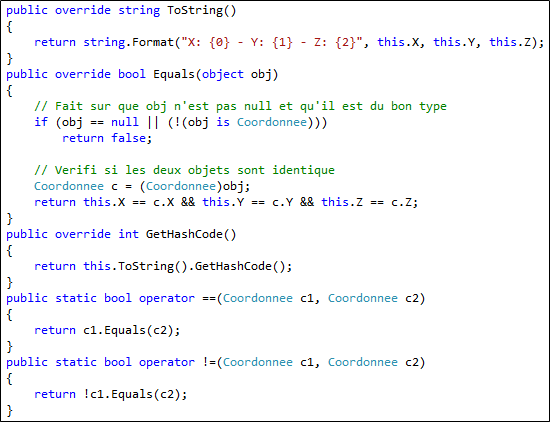

## Surcharge d’opérateurs de conversion

Les opérateurs de conversion retournent un nouvel objet de type différent qui garde habituellement un état similaire.

La surcharge de ces opérateurs requiert la définition d’une méthode statique qui retourne une valeur de type quelconque et accepte une valeur d’un autre type quelconque.

Un des types (soit la valeur de retour ou le paramètre) doit être du même type que la classe courante.

Ce type d’opérateur permet de convertir soit d’un type différent au type courant ou du type courant à un type différent.

L’opérateur peut soit être surchargé pour une conversion implicite ou une conversion explicite (seulement une est possible à la fois).

  > Les opérateurs de conversion implicites sont plus faciles à utiliser, mais les opérateurs explicites sont utiles lorsque vous souhaitez que les utilisateurs de l'opérateur soient informés qu'une conversion est en cours.
  
Une surcharge d’opérateur de conversion est constituée de:

- Modificateur public (`public`)
- Modificateur statique (`static`)
- Mot clé « explicit » ou « `implicit` »
- Mot clé « `operator` »
- Type de retour quelconque
- Un paramètre de type quelconque

---
```cs
public static explicit operator Coordonee(Point p)
{
    return new Coordonee(p.X, p.Y, 0);
}

public static explicit operator Point(Coordonee c)
{
    return new Point((int)c.X, (int)c.Y);
}
```
---

In [24]:
// ===========================================================================
// Classe Coordonnee
// ===========================================================================
public class Coordonnee
{
    public double X;
    public double Y;
    public double Z;

    // ===================================================================
    // Construsteurs
    // ===================================================================
    public Coordonnee()
    {
    }
    
    public Coordonnee(double x, double y, double z)
    {
        this.X = x;
        this.Y = y;
        this.Z = z;
    }

    // ===================================================================
    // Surcharge d’opérateurs unaires
    // ===================================================================
    public static Coordonnee operator ++(Coordonnee c1)
    {
        return new Coordonnee(c1.X + 1, c1.Y + 1, c1.Z + 1);
    }
    
    public static Coordonnee operator --(Coordonnee c1)
    {
        return new Coordonnee(c1.X - 1, c1.Y - 1, c1.Z - 1);
    }
    
    public static Coordonnee operator !(Coordonnee c1)
    {
        return new Coordonnee(-c1.X, -c1.Y, -c1.Z);
    }
    
    // ===================================================================
    // Surcharge d’opérateurs binaires
    // ===================================================================
    public static Coordonnee operator +(Coordonnee c1, Coordonnee c2)
    {
        return new Coordonnee(c1.X + c2.X, c1.Y + c2.Y, c1.Z + c2.Z);
    }
    
    public static Coordonnee operator -(Coordonnee c1, Coordonnee c2)
    {
        return new Coordonnee(c1.X - c2.X, c1.Y - c2.Y, c1.Z - c2.Z);
    }

    // ===================================================================
    // Surcharge d’opérateurs de comparaison
    // ===================================================================
    public static bool operator >(Coordonnee c1, Coordonnee c2)
    {
        return c1.X > c2.X || c1.Y > c2.Y || c1.Z > c2.Z;
    }
    
    public static bool operator <(Coordonnee c1, Coordonnee c2)
    {
        return c1.X < c2.X || c1.Y < c2.Y || c1.Z < c2.Z;
    }

    // ===================================================================
    // Surcharge d’opérateurs de conversion
    // ===================================================================
    public static explicit operator Coordonnee(Point p)
    {
        return new Coordonnee(p.X, p.Y, 0);
    }
    public static explicit operator Point(Coordonnee c)
    {
        return new Point((int)c.X, (int)c.Y);
    }

    // ===================================================================
    // Surcharge d’opérateurs d’égalité
    // ===================================================================
    public override bool Equals(object obj)
    {
        // Fait sur que obj n'est pas null et qu'il est du bon type
        if (obj == null || (!(obj is Coordonnee)))
            return false;

        // Verifi si les deux objets sont identique
        Coordonnee c = (Coordonnee)obj;
        return this.X == c.X && this.Y == c.Y && this.Z == c.Z;
    }

    public override int GetHashCode()
    {
        return this.ToString().GetHashCode();
    }

    public static bool operator ==(Coordonnee c1, Coordonnee c2)
    {
        return c1.Equals(c2);
    }

    public static bool operator !=(Coordonnee c1, Coordonnee c2)
    {
        return !c1.Equals(c2);
    }
    
    public override string ToString()
    {
        return string.Format("X:{0} Y:{1} Z:{2}", this.X, this.Y, this.Z);
    }
}

// ===========================================================================
// Structure Point
// ===========================================================================
public struct Point
{
    public int X;
    public int Y;

    public Point(int x, int y)
    {
        this.X = x;
        this.Y = y;
    }

    public void IncrementeX()
    {
        X++;
    }
    
    public void DecrementeX()
    {
        X--;
    }
    
    public void IncrementeY()
    {
        Y++;
    }
    
    public void DecrementeY()
    {
        Y--;
    }
    
    /*
    public static implicit operator Coordonnee(Point p)
    {
        return new Coordonnee(p.X, p.Y, 0);
    }
    */
}

// ===========================================================================
// Main
// ===========================================================================
var c1 = new Coordonnee();
//Point p1 = c1; // Il manque le cast
//Console.WriteLine(p1);

Point p2 = new Point(5, 10);
Coordonnee c2 = (Coordonnee)p2;
Console.WriteLine($"c2: {c2}");

c2: X:5 Y:10 Z:0
